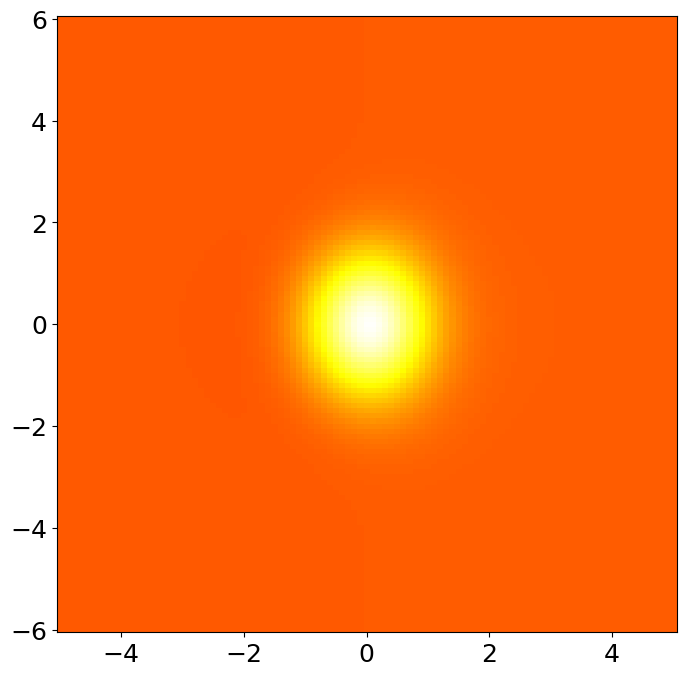

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

x = np.arange(-5,5.01,0.1)
y = np.arange(-6,6.01,0.1)
t = np.arange(0,10*np.pi+0.1,0.1)

X,Y,T = np.meshgrid(x,y,t)

A = np.exp(-(X**2 + 0.5*Y**2)) * np.cos(2*T) + \
    (np.divide(np.ones_like(X),np.cosh(X)) * np.tanh(X) * np.exp(-0.2*Y**2)) * np.sin(T)

fig = plt.figure()
pcm = plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,0],vmin=-1,vmax=1,shading='nearest')

    
def init():
    #pcm.set_array(np.array([]))
    return pcm

def animate(iter):
    pcm.set_array(A[:,:,iter])
#     print('Frame ' + str(iter))
    return pcm

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(t),interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())

/tmp/ipykernel_88529/1071371753.py:8: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')


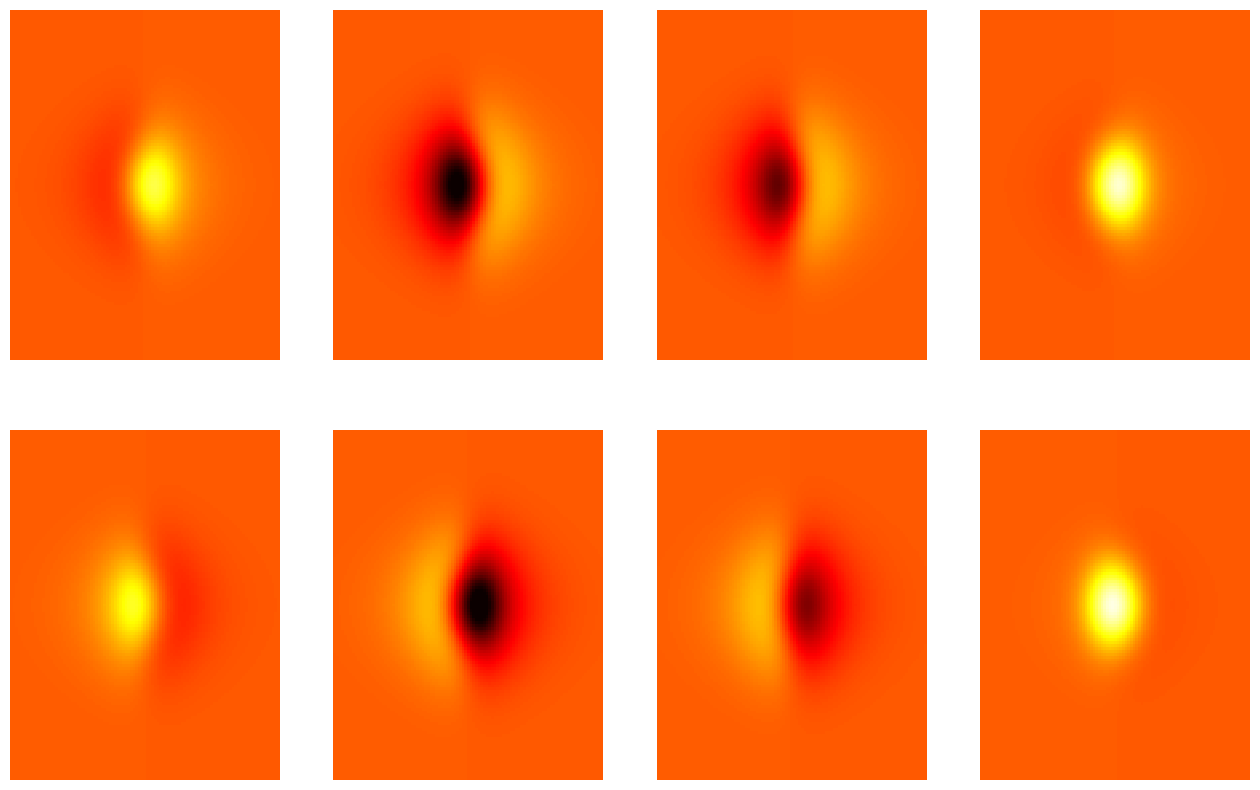

In [2]:
plt.rcParams['figure.figsize'] = [16,10]

fig, axs = plt.subplots(2,4)
axs = axs.reshape(-1)

for j in range(8):
    plt.sca(axs[j])
    plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')
    axs[j].axis('off')
    plt.set_cmap('hot')

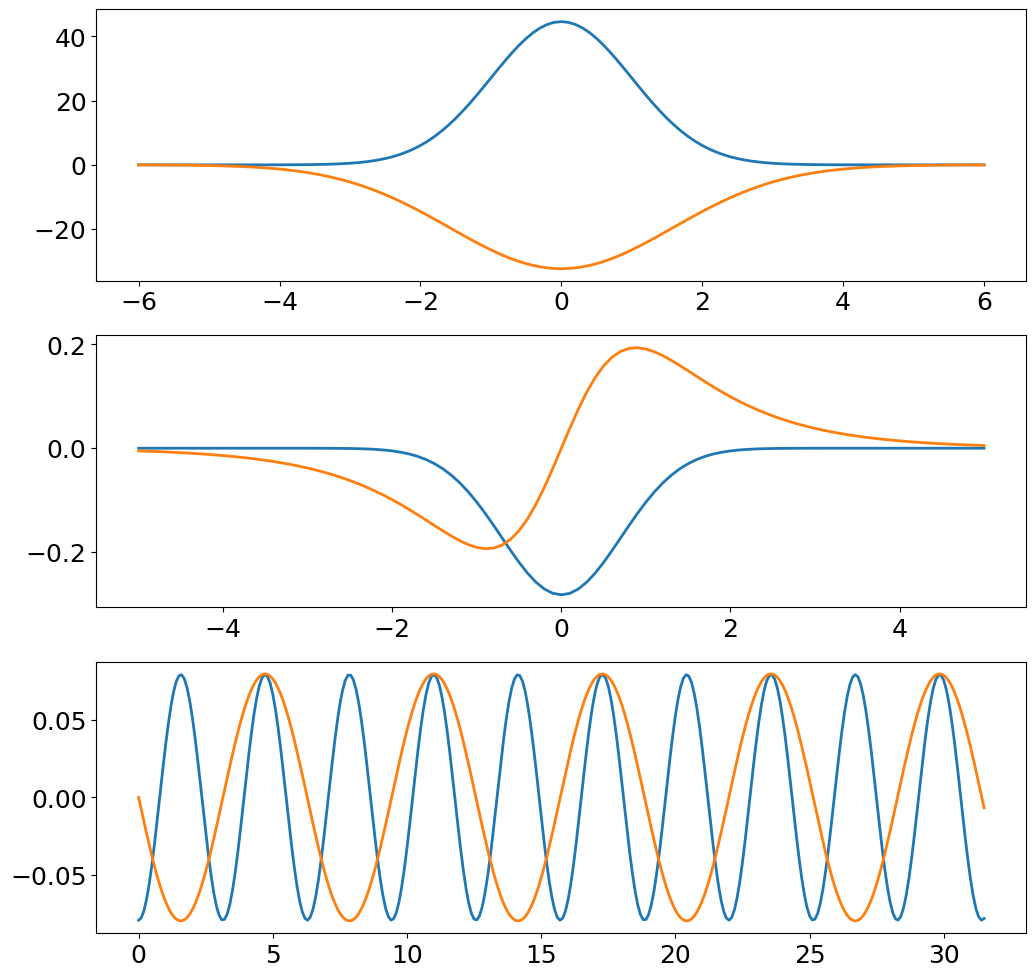

In [3]:
# Tensor factorization method requires the TensorLy module,
# available at http://tensorly.org/stable/installation.html

from tensorly.decomposition import parafac
plt.rcParams['figure.figsize'] = [12,12]


#A1, A2, A3 = parafac(A,2)  # doesn't work for tensorly 0.7.0
_A = parafac(A, 2)  # works for tensorly 0.7.0
A1, A2, A3 = _A.factors

fig, axs = plt.subplots(3,1)
axs[0].plot(y,A1,linewidth=2)
axs[1].plot(x,A2,linewidth=2)
axs[2].plot(t,A3,linewidth=2)
plt.show()